# 7.Phần Nâng cao - Cải tiến mô hình

Phần này học viên sẽ tự thực hiện việc cải tiến kết quả dự đoán của mô hình để cho ra kết quả tốt hơn ở phần trước. Tức là điểm số trên Kaggle của học viên phải vượt qua **0.8246 (Public Score), > top 50%**. Một vài phương pháp được đề xuất để học viên lựa chọn là:

- Thay đổi phương pháp lựa chọn đặc trưng để chọn ra bộ đặc trưng tốt hơn

- Sử dụng phương pháp khác để xử lý vấn đề mất cân bằng dữ liệu

- Sử dụng các mô hình học máy khác hoặc các kỹ thuật kết hợp mô hình nâng cao 

- Tập trung vào việc cải tiến các mô hình Boosting

- Tinh chỉnh các tham số của mô hình

- Sử dụng các kỹ thuật K-Fold hoặc chia nhỏ tập train để tránh hiện tượng Overfitting

### Load các package cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### Load tập dữ liệu

In [2]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

test_id = test['ID']
train.drop('ID', axis=1, inplace = True)
test.drop('ID', axis=1, inplace = True)

X_train = train.drop('TARGET', axis=1)
y_train = train['TARGET']

### Lựa chọn đặc trưng

Ở bước này chúng ta sẽ thực hiện các phương pháp lựa chọn đặc trưng sau:

1. Loại các đặc trưng trùng.
2. Loại các đặc trưng quasi-constant.
3. Lựa chọn các đặc trưng bằng chỉ số ROC-AUC

In [3]:
from feature_engine.selection import DropDuplicateFeatures

sel = DropDuplicateFeatures()
sel.fit(X_train)

X_train_dropduplicate = sel.transform(X_train)
X_test_dropduplicate = sel.transform(test)


In [4]:
from feature_engine.selection import DropConstantFeatures

sel = DropConstantFeatures(tol=0.9)

sel.fit(X_train_dropduplicate)

X_train_dropconstant = sel.transform(X_train_dropduplicate)
X_test_dropconstant = sel.transform(X_test_dropduplicate)

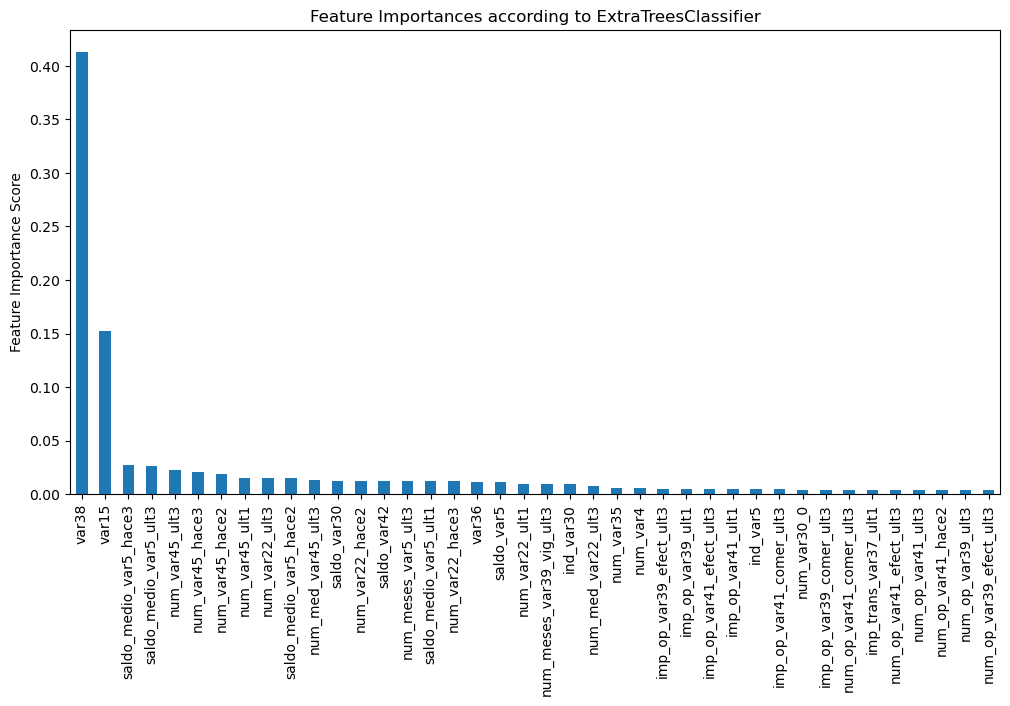

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(random_state=1729)
selector = clf.fit(X_train_dropconstant, y_train)

# plot most important features
feat_imp = pd.Series(clf.feature_importances_, index = X_train_dropconstant.columns.values).sort_values(ascending=False)
feat_imp[:40].plot(kind='bar', title='Feature Importances according to ExtraTreesClassifier', figsize=(12, 8))
plt.ylabel('Feature Importance Score')
plt.subplots_adjust(bottom=0.3)
# plt.savefig('1.png')
plt.show()

# clf.feature_importances_ 
fs = SelectFromModel(estimator=clf , prefit=True)

X_train_selected = fs.transform(X_train_dropconstant)
X_test_selected = fs.transform(X_test_dropconstant)

### Co dãn các đặc trưng

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train_selected)

X_train_scale = scaler.transform(X_train_selected)
X_test_scale = scaler.transform(X_test_selected)